# LOVCCLIM orb sea ice

In [1]:
import xarray as xr
import numpy as np

def cal_ice_volume_lc(ds_seaice,lat_range=[-90,0],lon_step=2.5):
    # Subset the dataset to include only the desired latitudes
    ds_seaice_subset = ds_seaice.sel(lat=slice(lat_range[0], lat_range[1])) 
    
    # Constants
    R = 6371  # Earth's radius in km
    delta_theta = lon_step / 180 * np.pi  # 2.5 degrees in radians

    # Convert latitude values to radians
    lat_radians = np.radians(ds_seaice_subset['lat'].values)

    # Compute latitudinal boundaries
    lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2

    # Calculate area of each grid cell
    A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))

    # Remove the data corresponding to the last and first latitudes in ds_seaice_subset
    ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))

    # Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
    A_center_lats = ds_seaice_subset['lat'].values[1:-1]
    A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

    # Multiply sea ice concentration (sic) with A
    grid_ice = ds_seaice_subset_reduced['ice']
    grid_ice = grid_ice * A_xr

    # Sum up the resulting product over latitude and longitude
    lc_ice_volume = grid_ice.sum(dim=["lat", "lon"]).values / 1e6  # Convert to million km²

    return lc_ice_volume




shape of the weight: (72,)


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (age: 131, lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float64 2.4e+04 2.39e+04 2.38e+04 ... 1.11e+04 1.1e+04
Data variables:
    ice      (age, lat, lon) float64 ...
    weight   (lat) float64 0.02181 0.0654 0.1089 ... 0.1089 0.0654 0.02181
Attributes:
    Conventions:  CF-1.7
    title:        Loveclim sensitivity experiment with orbital only - sea ice
    note:         100 year average>

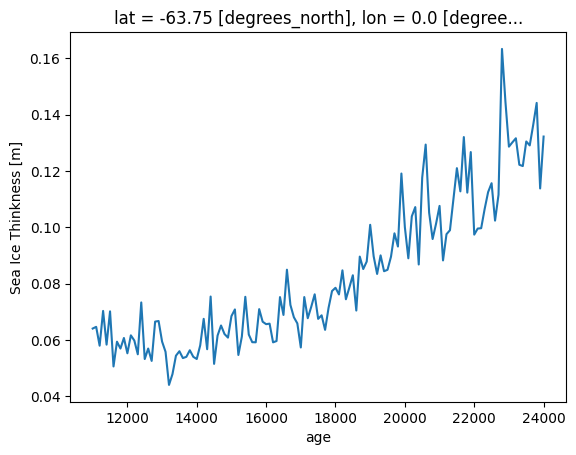

In [2]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('D:/VScode/Last_deglaciation/loveclim_data/loveclim_se_orbital_only_seaice.nc')
ds
# ds['ice'].isel(lat=10, lon=0).plot()

# # rename the time to age
ds = ds.rename({'mtime': 'age'})
# # multiply age by 1000
ds['age'] = ds['age'] * 1000




ds = ds[['ice']]
ds = ds.sel(age=slice(24000, 11000))


# plot a record from the ds_sat at given lat and lon
ds['ice'].isel(lat=10, lon=0).plot()

ds_lc=ds

weight = np.cos(np.deg2rad(ds_lc['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_lc['weight'] = weight

ds_lc.info

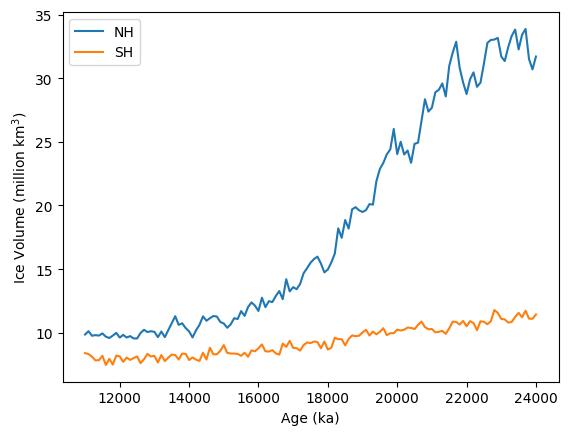

In [3]:
lc_ice_volume_nh = cal_ice_volume_lc(ds_lc, lat_range=[0, 90])
lc_ice_volume_sh = cal_ice_volume_lc(ds_lc, lat_range=[-90, 0])

# plot the ice volume
import matplotlib.pyplot as plt
plt.plot(ds_lc['age'], lc_ice_volume_nh, label='NH')
plt.plot(ds_lc['age'], lc_ice_volume_sh, label='SH')
plt.xlabel('Age (ka)')
plt.ylabel('Ice Volume (million km$^3$)')
plt.legend()

# LOVECLIM all forcing

shape of the weight: (72,)


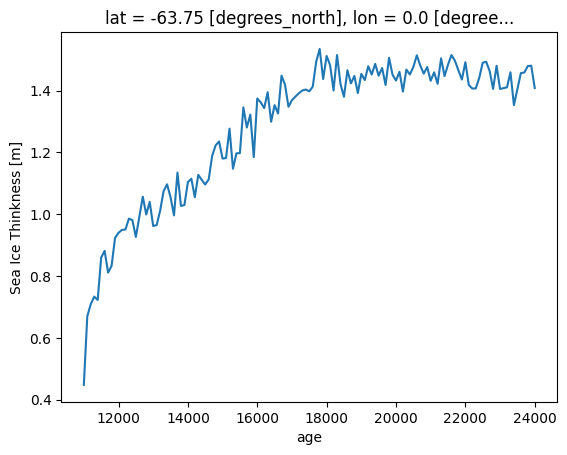

In [4]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('D:/VScode/Last_deglaciation/loveclim_data/loveclim_784k_seaice.nc')
ds
# ds['ice'].isel(lat=10, lon=0).plot()

# # rename the time to age
ds = ds.rename({'mtime': 'age'})
# rename latitude, longitude to lat, lon
ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})

# # multiply age by 1000
ds['age'] = ds['age'] * 1000




ds = ds[['ice']]
ds = ds.sel(age=slice(24000, 11000))


# plot a record from the ds_sat at given lat and lon
ds['ice'].isel(lat=10, lon=0).plot()

ds_lc_all=ds

weight = np.cos(np.deg2rad(ds_lc_all['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_lc_all['weight'] = weight




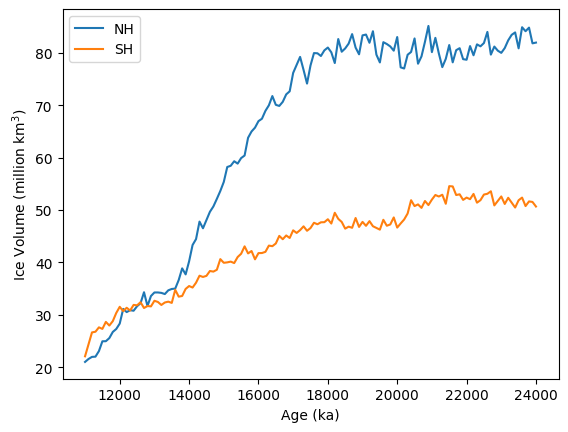

In [5]:
lc_ice_volume_nh_all = cal_ice_volume_lc(ds_lc_all, lat_range=[0, 90])
lc_ice_volume_sh_all = cal_ice_volume_lc(ds_lc_all, lat_range=[-90, 0])

# plot the ice volume
import matplotlib.pyplot as plt
plt.plot(ds_lc_all['age'], lc_ice_volume_nh_all, label='NH')
plt.plot(ds_lc_all['age'], lc_ice_volume_sh_all, label='SH')
plt.xlabel('Age (ka)')
plt.ylabel('Ice Volume (million km$^3$)')
plt.legend()

plt.show()



In [6]:
# # create an xarray called trace_all_iceA_nh with the age and trace_nh_all
# # trace_all_iceA_nh = xr.DataArray(trace_nh_all, dims=["age"], coords={"age": ds_trace_all['age']})
# trace_all_iceA_sh = xr.DataArray(trace_sh_all, dims=["age"], coords={"age": ds_trace_all['age']})

# # save the xarrays to /processed_model_data
# # trace_all_iceA_nh.to_netcdf('processed_model_data/trace_all_iceA_nh.nc')
# trace_all_iceA_sh.to_netcdf('processed_model_data/trace_all_iceA_sh.nc')

# # read the data
# # trace_all_iceA_nh = xr.open_dataarray('processed_model_data/trace_all_iceA_nh.nc')
# trace_all_iceA_sh = xr.open_dataarray('processed_model_data/trace_all_iceA_sh.nc')



lc_all_iceV_sh = xr.DataArray(lc_ice_volume_sh_all, dims=["age"], coords={"age": ds_lc_all['age']})

# save data
lc_all_iceV_sh.to_netcdf('processed_model_data/lc_all_iceV_sh.nc')

# read data
lc_all_iceV_sh = xr.open_dataarray('processed_model_data/lc_all_iceV_sh.nc')


# TraCE orb

In [7]:
import xarray as xr
import numpy as np

def cal_ice_area_trace(ds_seaice,lat_range=[-90,0],lon_step=3.75):
    # Subset the dataset to include only the desired latitudes
    ds_seaice_subset = ds_seaice.sel(lat=slice(lat_range[0], lat_range[1])) 
    
    # Constants
    R = 6371  # Earth's radius in km
    delta_theta = lon_step / 180 * np.pi  # 2.5 degrees in radians

    # Convert latitude values to radians
    lat_radians = np.radians(ds_seaice_subset['lat'].values)

    # Compute latitudinal boundaries
    lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2

    # Calculate area of each grid cell
    A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))

    # Remove the data corresponding to the last and first latitudes in ds_seaice_subset
    ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))

    # Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
    A_center_lats = ds_seaice_subset['lat'].values[1:-1]
    A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

    # Multiply sea ice concentration (sic) with A
    sic_mean = ds_seaice_subset_reduced['sic']
    sic_area = sic_mean * A_xr

    # Sum up the resulting product over latitude and longitude
    trace_sic_area = sic_area.sum(dim=["lat", "lon"]).values / 1e6  # Convert to million km²

    return trace_sic_area




shape of the weight: (48,)


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (age: 2204, lat: 48, lon: 96)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * age      (age) float64 2.2e+04 2.199e+04 2.198e+04 ... -10.0 -20.0 -30.0
Data variables:
    sic      (age, lat, lon) float32 ...
    weight   (lat) float64 0.04956 0.1136 0.1775 ... 0.1775 0.1136 0.04956
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVTj
    title:                     b30.22_0kaDVTj b30.22_0kaDVTj
    logname:                   fenghe
    host:                      yodjag9
    Version:                   $Name: ccsm3_0_1_beta24 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Jan  5 07:19:59 2013: ncks -O -x -v time_b...
    nco_openmp_thread_number:  1
    NCO:   

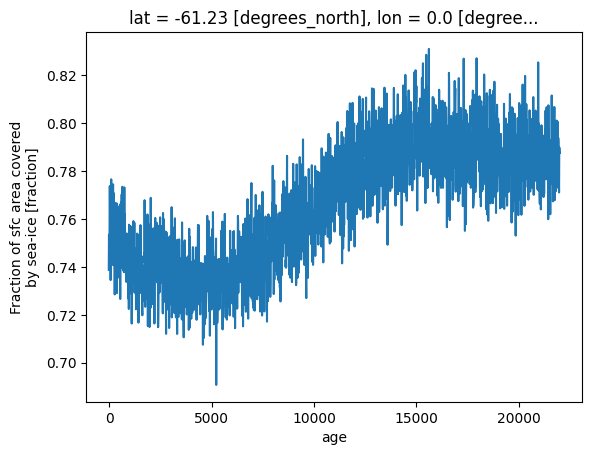

In [8]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/b30.00_4kaDVTj.cam2.ncrcat.ann.nc')
ds

# rename the TREFHT to sat
ds = ds.rename({'ICEFRAC': 'sic'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000


ds['sic'].isel(lat=7, lon=0).plot()

ds_trace = ds[['sic']]

weight = np.cos(np.deg2rad(ds_trace['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_trace['weight'] = weight

ds_trace.info

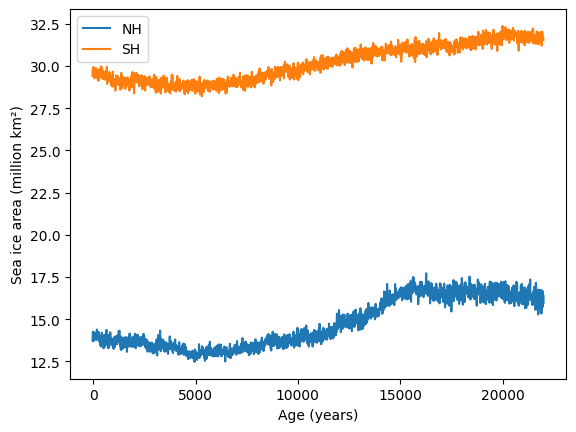

In [9]:
trace_nh=cal_ice_area_trace(ds_trace,lat_range=[0,90])
trace_sh=cal_ice_area_trace(ds_trace,lat_range=[-90,0])

# plot
import matplotlib.pyplot as plt
plt.plot(ds_trace['age'], trace_nh, label='NH')
plt.plot(ds_trace['age'], trace_sh, label='SH')
plt.xlabel('Age (years)')
plt.ylabel('Sea ice area (million km²)')
plt.legend()

# TraCE all forcing

shape of the weight: (48,)


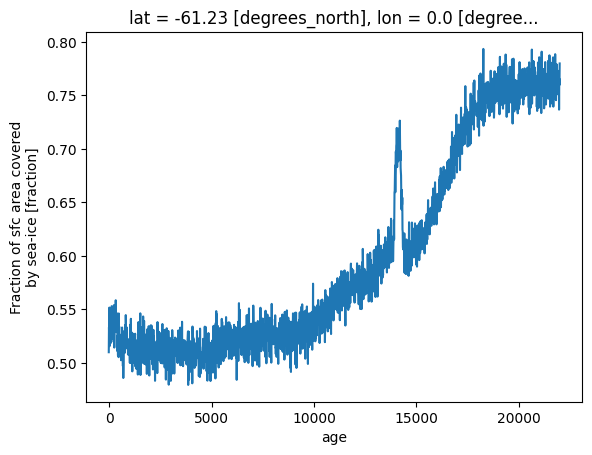

In [10]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.ICEFRAC.22000BP_decavg_400BCE.nc')

ds
# rename the TREFHT to sat
ds = ds.rename({'ICEFRAC': 'sic'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000


ds = ds[['sic']]



# plot a record from the ds_sat at given lat and lon
ds['sic'].isel(lat=7, lon=0).plot()

ds_trace_all = ds

weight = np.cos(np.deg2rad(ds_trace_all['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_trace_all['weight'] = weight

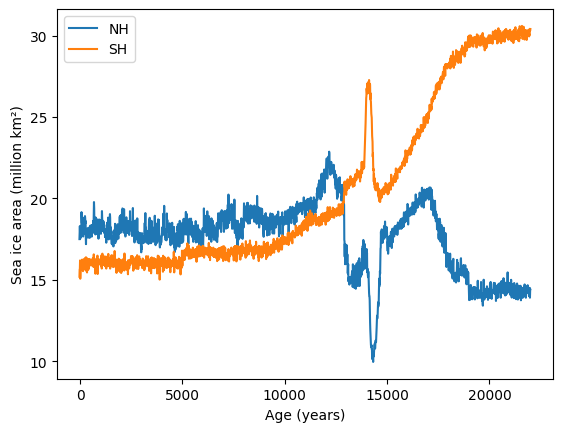

In [11]:
trace_nh_all=cal_ice_area_trace(ds_trace_all,lat_range=[0,90])
trace_sh_all=cal_ice_area_trace(ds_trace_all,lat_range=[-90,0])

# plot
import matplotlib.pyplot as plt
plt.plot(ds_trace_all['age'], trace_nh_all, label='NH')
plt.plot(ds_trace_all['age'], trace_sh_all, label='SH')
plt.xlabel('Age (years)')
plt.ylabel('Sea ice area (million km²)')
plt.legend()    




In [ ]:
# create an xarray called trace_all_iceA_nh with the age and trace_nh_all
# trace_all_iceA_nh = xr.DataArray(trace_nh_all, dims=["age"], coords={"age": ds_trace_all['age']})
trace_all_iceA_sh = xr.DataArray(trace_sh_all, dims=["age"], coords={"age": ds_trace_all['age']})

# save the xarrays to /processed_model_data
# trace_all_iceA_nh.to_netcdf('processed_model_data/trace_all_iceA_nh.nc')
trace_all_iceA_sh.to_netcdf('processed_model_data/trace_all_iceA_sh.nc')

# read the data
# trace_all_iceA_nh = xr.open_dataarray('processed_model_data/trace_all_iceA_nh.nc')
trace_all_iceA_sh = xr.open_dataarray('processed_model_data/trace_all_iceA_sh.nc')

# LGMR

In [12]:
import xarray as xr
import numpy as np

def cal_ice_area(ds_seaice,lat_range=[-90,0],lon_step=2.5):
    # Subset the dataset to include only the desired latitudes
    ds_seaice_subset = ds_seaice.sel(lat=slice(lat_range[0], lat_range[1])) 
    
    # Constants
    R = 6371  # Earth's radius in km
    delta_theta = lon_step / 180 * np.pi  # 2.5 degrees in radians

    # Convert latitude values to radians
    lat_radians = np.radians(ds_seaice_subset['lat'].values)

    # Compute latitudinal boundaries
    lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2

    # Calculate area of each grid cell
    A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))

    # Remove the data corresponding to the last and first latitudes in ds_seaice_subset
    ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))

    # Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
    A_center_lats = ds_seaice_subset['lat'].values[1:-1]
    A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

    # Multiply sea ice concentration (sic) with A
    sic_mean = ds_seaice_subset_reduced['sic'][0, :, :]
    sic_area = sic_mean * A_xr

    # Sum up the resulting product over latitude and longitude
    LGMR_sic_area = sic_area.sum(dim=["lat", "lon"]).values / 1e6  # Convert to million km²

    return LGMR_sic_area




In [13]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_lgmr = xr.open_dataset(path)
ds_lgmr = ds_lgmr.where(ds_lgmr.age>=10000, drop=True)

# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_lgmr['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_lgmr['weight'] = weight
ds_lgmr

shape of the weight: (96,)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (dims: 5, age: 70, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.01e+04 1.03e+04 1.05e+04 ... 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 0.0 0.0 0.0 ... 0.9979 0.9979 0.9979
    weight   (lat) float32 0.0 0.03306 0.06609 0.09905 ... 0.06609 0.03306 0.0

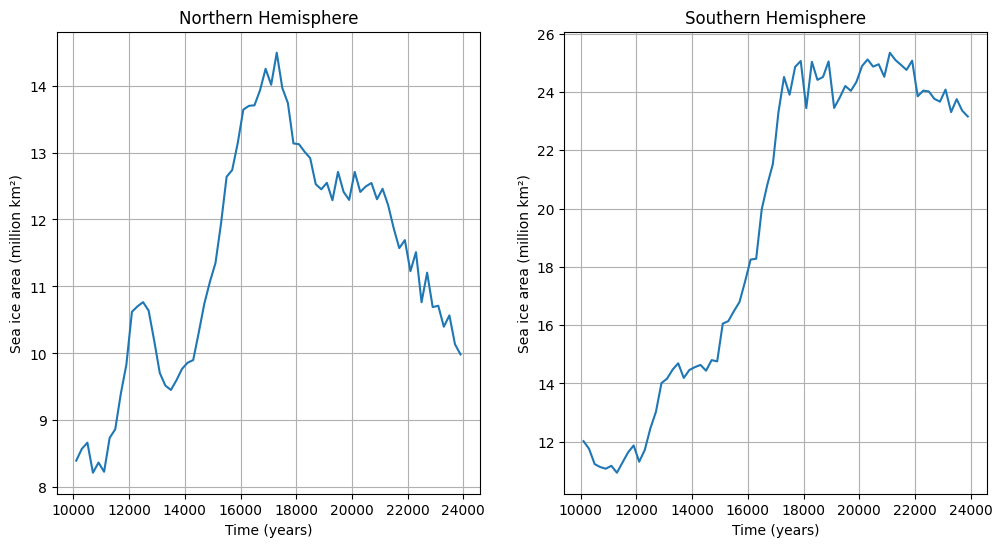

In [14]:
lgmr_nh=cal_ice_area(ds_lgmr,lat_range=[0,90],lon_step=2.5)
lgmr_sh=cal_ice_area(ds_lgmr,lat_range=[-90,0],lon_step=2.5)

# plot them side by side
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(ds_lgmr['age'], lgmr_nh) 
ax[0].set_title('Northern Hemisphere')
ax[0].set_ylabel('Sea ice area (million km²)')
ax[0].set_xlabel('Time (years)')
ax[0].grid()

ax[1].plot(ds_lgmr['age'], lgmr_sh)
ax[1].set_title('Southern Hemisphere')
ax[1].set_ylabel('Sea ice area (million km²)')
ax[1].set_xlabel('Time (years)')
ax[1].grid()

# EBM data

In [15]:
# read the D:\VScode\Last_deglaciation\EBM_data\EBM_results_shorten_Jan31_nh.xlsx
import pandas as pd
df_EBM_NH = pd.read_excel('D:/VScode/Last_deglaciation/EBM_data/EBM_results_shorten_Jan31_nh.xlsx')

# extract the 'age' and SAT (50 TO 70S) from the df_EBM_NH
df_EBM_NH = df_EBM_NH[['age', 'iceA (NH)']]
# rename the column name 'SAT (50 TO 70S)' to 'sat'
df_EBM_NH = df_EBM_NH.rename(columns={'iceA (NH)': 'iceA'})
# age *1000
df_EBM_NH['age'] = df_EBM_NH['age'] * 1000
df_EBM_NH = df_EBM_NH[(df_EBM_NH['age'] >= 18000) & (df_EBM_NH['age'] <= 22000)]
# sat column minors the sat at 22000 age
df_EBM_NH['iceA'] = df_EBM_NH['iceA'] - df_EBM_NH['iceA'].iloc[-1]

df_EBM_SH= pd.read_excel('D:/VScode/Last_deglaciation/EBM_data/EBM_results_shorten_Jan31.xlsx')

# extract the 'age' and SAT (50 TO 70S) from the df_EBM_NH
df_EBM_SH = df_EBM_SH[['age', 'iceA (SH)']]
# rename the column name 'SAT (50 TO 70S)' to 'sat'
df_EBM_SH = df_EBM_SH.rename(columns={'iceA (SH)': 'iceA'})
# age *1000
df_EBM_SH['age'] = df_EBM_SH['age'] * 1000
df_EBM_SH = df_EBM_SH[(df_EBM_SH['age'] >= 18000) & (df_EBM_SH['age'] <= 22000)]
# sat column minors the sat at 22000 age
df_EBM_SH['iceA'] = df_EBM_SH['iceA'] - df_EBM_SH['iceA'].iloc[-1]
df_EBM_SH

,age,iceA
8,18000,-0.547966
9,19000,-0.436966
10,20000,-0.335634
11,21000,-0.193909
12,22000,0.000000


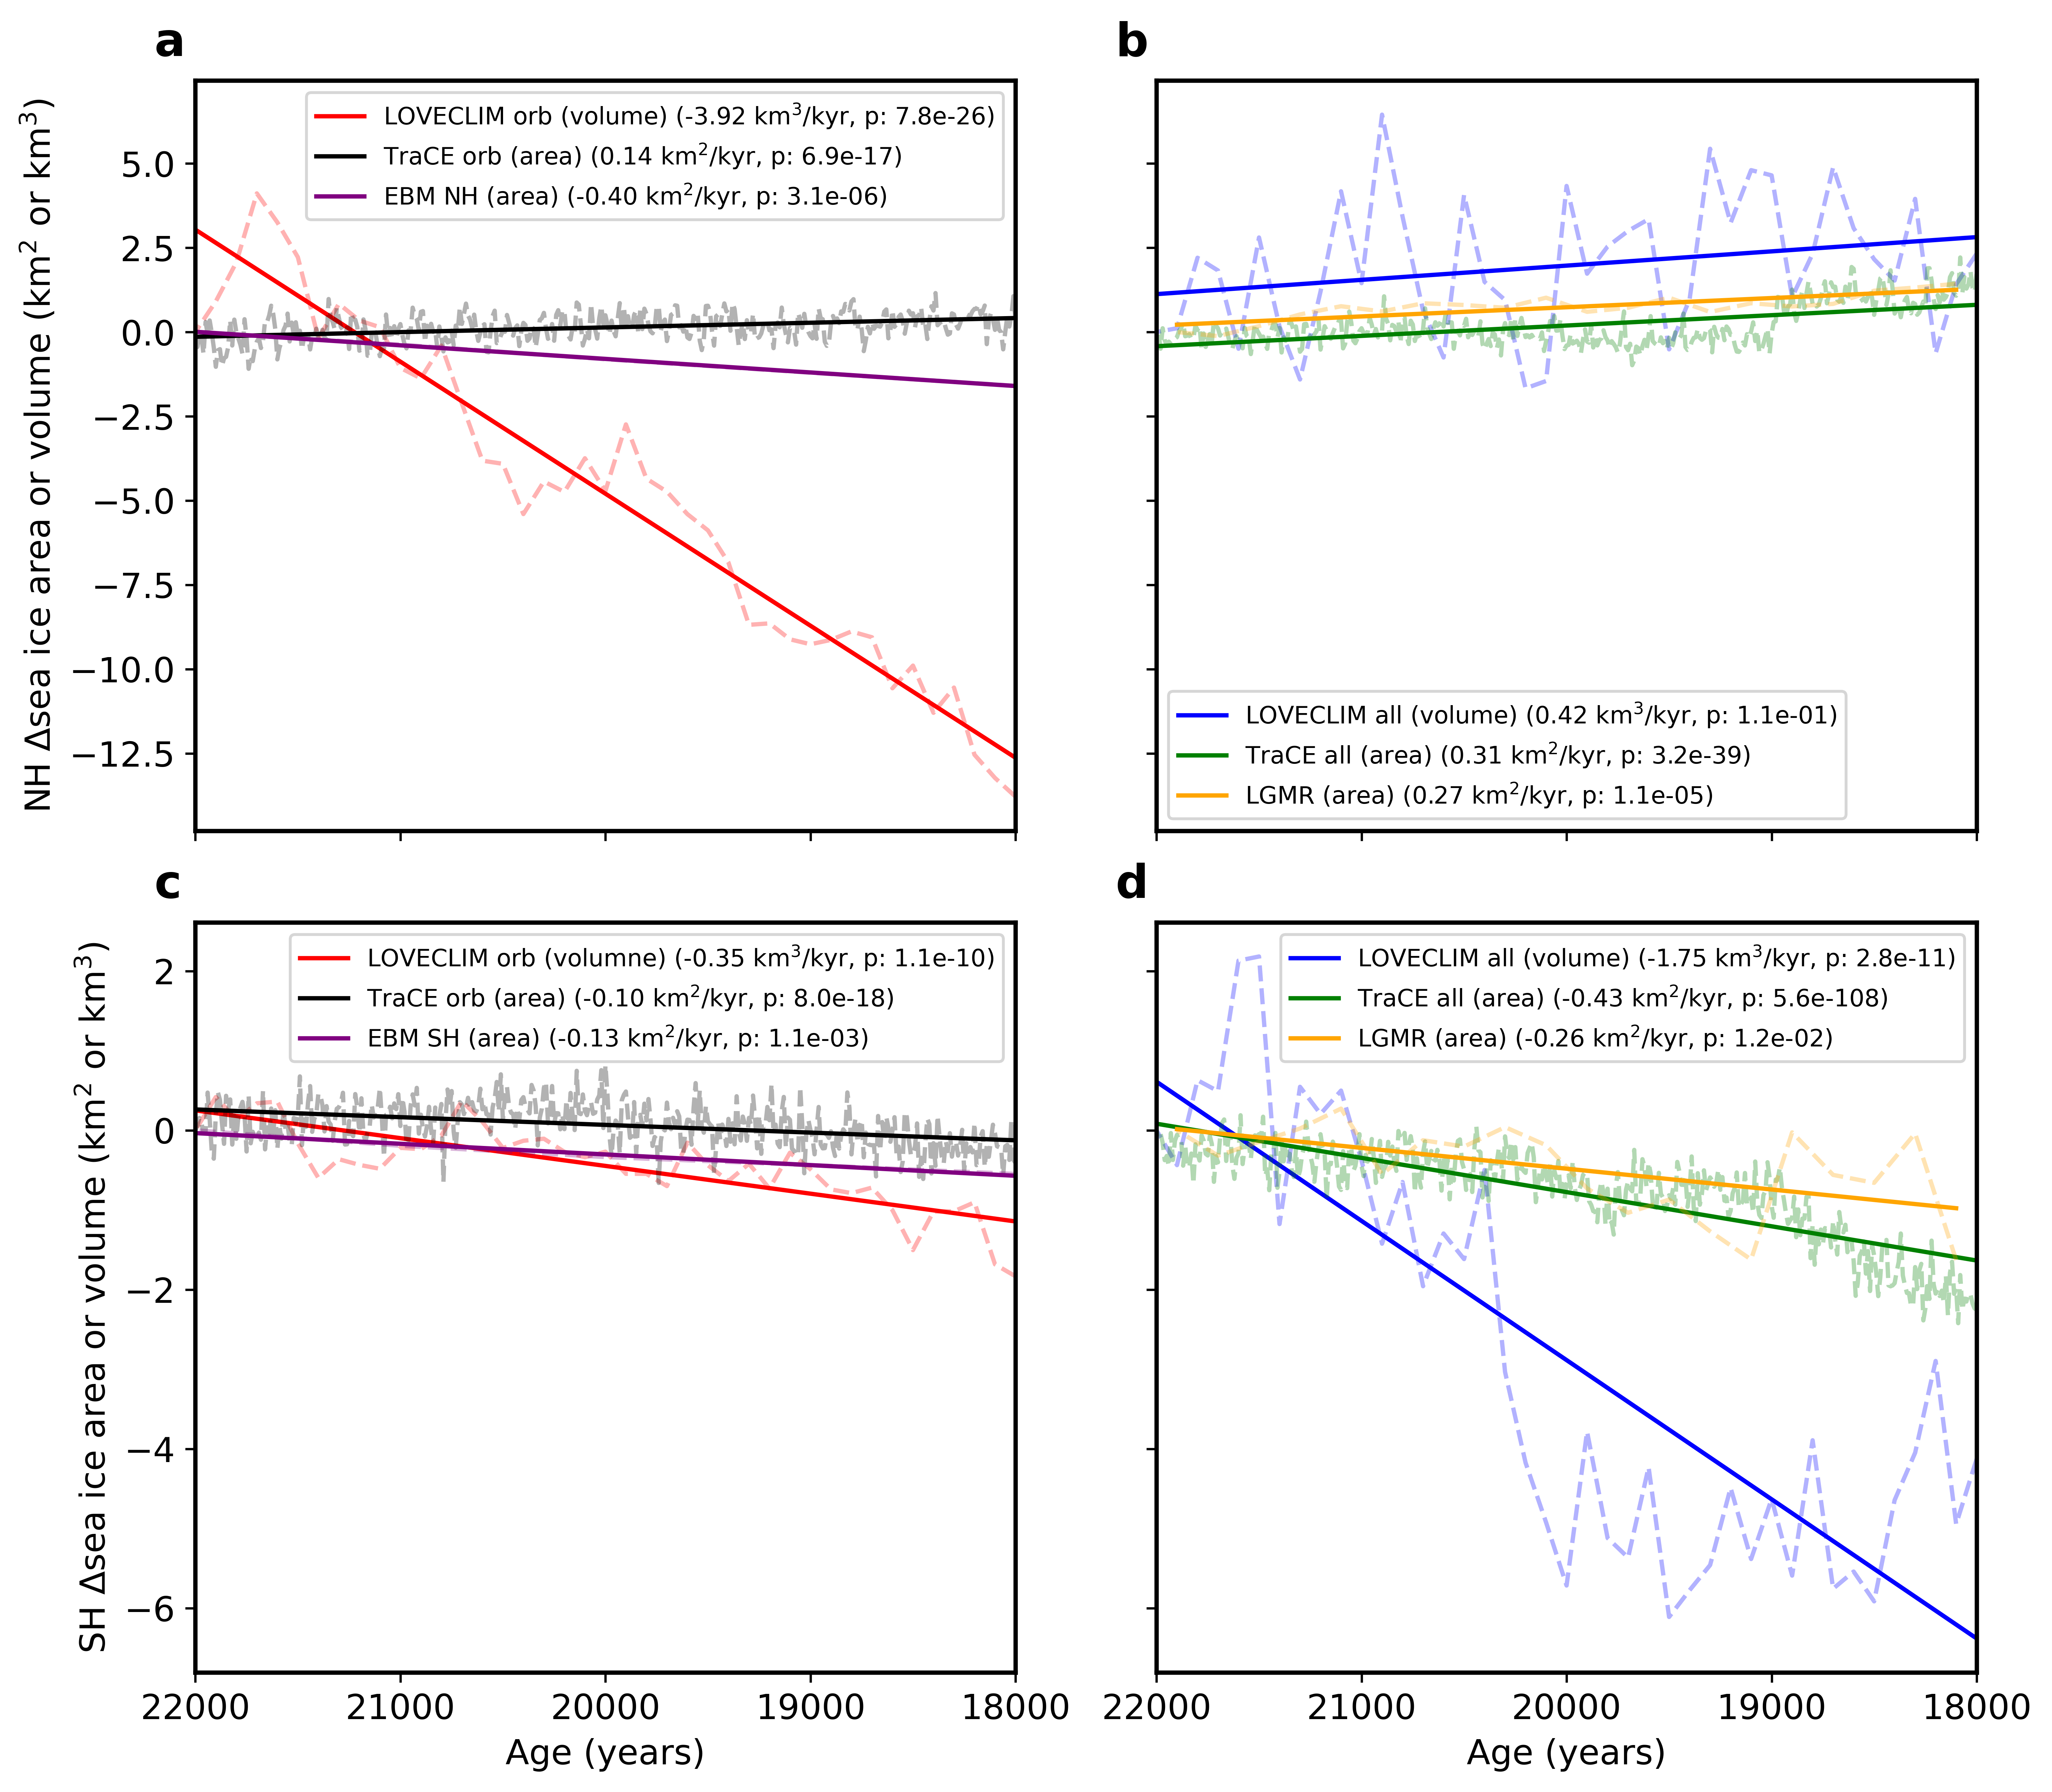

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def crop_and_sort_data(age, data, start_time, end_time):
    # Combine the age and data arrays
    combined = np.vstack((age, data)).T
    
    # Sort the array by the age column
    sorted_combined = combined[combined[:, 0].argsort()]
    
    # Crop the data to the given time window
    cropped_data = sorted_combined[(sorted_combined[:, 0] >= start_time) & (sorted_combined[:, 0] <= end_time)]
    
    # Separate the age and data into two arrays
    cropped_age = cropped_data[:, 0]
    cropped_data = cropped_data[:, 1]

    # return the relative vlaues of data by minors the last data
    cropped_data = cropped_data - cropped_data[-1]

    
    return cropped_age, cropped_data


lc_age_cropped,lc_ice_volume_nh_cropped= crop_and_sort_data(ds_lc['age'].values, lc_ice_volume_nh, 18000, 22000)
# get the lc_ice_volume_sh_cropped, without receiving ages
_, lc_ice_volume_sh_cropped= crop_and_sort_data(ds_lc['age'].values, lc_ice_volume_sh, 18000, 22000)

lc_age_all_cropped,lc_ice_volume_nh_all_cropped= crop_and_sort_data(ds_lc_all['age'].values, lc_ice_volume_nh_all, 18000, 22000)
_, lc_ice_volume_sh_all_cropped= crop_and_sort_data(ds_lc_all['age'].values, lc_ice_volume_sh_all, 18000, 22000)

trace_age_cropped,trace_nh_cropped= crop_and_sort_data(ds_trace['age'].values, trace_nh, 18000, 22000)
_, trace_sh_cropped= crop_and_sort_data(ds_trace['age'].values, trace_sh, 18000, 22000)

trace_age_all_cropped,trace_nh_all_cropped= crop_and_sort_data(ds_trace_all['age'].values, trace_nh_all, 18000, 22000)
_, trace_sh_all_cropped= crop_and_sort_data(ds_trace_all['age'].values, trace_sh_all, 18000, 22000)

lgmr_age_cropped,lgmr_nh_cropped= crop_and_sort_data(ds_lgmr['age'].values, lgmr_nh, 18000, 22000)
_, lgmr_sh_cropped= crop_and_sort_data(ds_lgmr['age'].values, lgmr_sh, 18000, 22000)



def plot_regression(ax, ages, temps, label, color, is_ice_volume=False):
    slope, intercept, r_value, p_value, std_err = linregress(ages, temps)
    reg_line = intercept + slope * ages
    slope *= -1000  # Convert to °C/kyr
    ax.plot(ages, temps, color=color, alpha=0.3, linestyle='--')
    if is_ice_volume:
        # ax.plot(ages, reg_line, color=color, alpha=1,label=f'{label} (slope: {slope:.2f} km$^3$/kyr, p-value: {p_value:.1e})')
        ax.plot(ages, reg_line, color=color, alpha=1,label=f'{label} ({slope:.2f} km$^3$/kyr, p: {p_value:.1e})')
    else:
        # ax.plot(ages, reg_line, color=color, alpha=1,label=f'{label} (slope: {slope:.2f} km$^2$/kyr, p-value: {p_value:.1e})')
        ax.plot(ages, reg_line, color=color, alpha=1,label=f'{label} ({slope:.2f} km$^2$/kyr, p: {p_value:.1e})')
    return slope, p_value



# Plotting configuration
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8.7), sharex='col', sharey='row', dpi=600)

# First column plots
plot_regression(axs[0, 0], lc_age_cropped, lc_ice_volume_nh_cropped, 'LOVECLIM orb (volume)', 'red', is_ice_volume=True)
plot_regression(axs[0, 0], trace_age_cropped, trace_nh_cropped, 'TraCE orb (area)', 'black')
# plot the lc_ice_volume_cropped in twin y axis
# plot_regression(axs[0, 0].twinx(), lc_age_cropped, lc_ice_volume_nh_cropped, 'LOVECLIM orb', 'red')

plot_regression(axs[1, 0], lc_age_cropped, lc_ice_volume_sh_cropped, 'LOVECLIM orb (volumne)', 'red', is_ice_volume=True)
plot_regression(axs[1, 0], trace_age_cropped, trace_sh_cropped, 'TraCE orb (area)', 'black')



# # Second column plots
plot_regression(axs[0, 1], lc_age_all_cropped, lc_ice_volume_nh_all_cropped, 'LOVECLIM all (volume)', 'blue', is_ice_volume=True)
plot_regression(axs[0, 1], trace_age_all_cropped, trace_nh_all_cropped, 'TraCE all (area)', 'green')
plot_regression(axs[0, 1], lgmr_age_cropped, lgmr_nh_cropped, 'LGMR (area)', 'orange')

plot_regression(axs[1, 1], lc_age_all_cropped, lc_ice_volume_sh_all_cropped, 'LOVECLIM all (volume)', 'blue', is_ice_volume=True)
plot_regression(axs[1, 1], trace_age_all_cropped, trace_sh_all_cropped, 'TraCE all (area)', 'green')
plot_regression(axs[1, 1], lgmr_age_cropped, lgmr_sh_cropped, 'LGMR (area)', 'orange')


plot_regression(axs[0, 0], df_EBM_NH['age'].values, df_EBM_NH['iceA'].values, 'EBM NH (area)', 'purple')
plot_regression(axs[1, 0], df_EBM_SH['age'].values, df_EBM_SH['iceA'].values, 'EBM SH (area)', 'purple')


for ax in axs.flat:
    ax.legend(fontsize='small')
    # ax.set_xlabel('Age (years)')
    # ax.set_ylabel('ΔSAT (°C)')
    ax.invert_xaxis()
    ax.set_xlim(22000, 18000)
    # set xticks
    ax.set_xticks(np.arange(22000, 17900, -1000))
    # ax.set_ylim(-2, 2)
    

# axs[0,0].set_ylim(-2.5, 1)
# axs[1,0].set_ylim(-0.4, 1.8)
axs[0,0].set_ylabel('NH Δsea ice area or volume (km$^2$ or km$^3$)', fontsize=12)
axs[1,0].set_ylabel('SH Δsea ice area or volume (km$^2$ or km$^3$)', fontsize=12)

axs[1,0].set_xlabel('Age (years)', fontsize=12)
axs[1,1].set_xlabel('Age (years)', fontsize=12)

# set the size of labels
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
    # set the size of x and y labels
    # ax.set_ylabel('ΔSAT (°C)', fontsize=12)

# set the line width of the spines
for ax in axs.flat:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)


# axs[0,0].set_ylim(-0.8, 0.8)
# axs[1,0].set_ylim(-0.8, 0.8)

# axs[0,1].set_ylim(-2.5, 1.75)
# axs[1,1].set_ylim(-2.5, 1.75)

# add a, b, c, d to each subplot
axs[0,0].text(-0.05, 1.08, 'a', transform=axs[0,0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[0,1].text(-0.05, 1.08, 'b', transform=axs[0,1].transAxes, fontsize=16, fontweight='bold', va='top')
axs[1,0].text(-0.05, 1.08, 'c', transform=axs[1,0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[1,1].text(-0.05, 1.08, 'd', transform=axs[1,1].transAxes, fontsize=16, fontweight='bold', va='top')


plt.tight_layout()
plt.show()
